In [32]:
import pandas as pd

In [67]:
df = pd.read_csv(r'C:\Users\User\Desktop\Anaconda Project\education-economy-data(dataset)\education-economy-data.csv')
print(df.head())

       Country  Literacy Rate  Physician Density  GDP (Current USD)  \
0  Afghanistan           43.0               0.28       1.723305e+10   
1      Albania           98.1               1.20       2.354718e+10   
2      Algeria           81.4               1.72       2.476260e+11   
3      Andorra          100.0               3.33       3.785067e+09   
4       Angola           71.1               0.21       8.482465e+10   

   GDP Growth (% Annual)  GDP per Capita (Current USD)  \
0               2.710887                    415.707417   
1               3.936625                   8575.171134   
2               4.100000                   5364.027950   
3               2.583555                  46812.448450   
4               1.001289                   2308.159767   

  GDP per Capita Category  Unemployment Rate (%) Continent  
0                Very Low                 13.991      Asia  
1                     Mid                 10.108    Europe  
2                     Low                

In [51]:
df['Continent'].str.title()
#I brought them all into one register so that Pandas wouldn't consider different registers of one variant as two variants. register check

0               Asia
1             Europe
2             Africa
3             Europe
4             Africa
           ...      
186    South America
187             Asia
188             Asia
189           Africa
190           Africa
Name: Continent, Length: 191, dtype: object

In [52]:
df['Country'].str.title()
#I brought them all into one register so that Pandas wouldn't consider different registers of one variant as two variants. register check

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
186      Venezuela
187        Vietnam
188          Yemen
189         Zambia
190       Zimbabwe
Name: Country, Length: 191, dtype: object

In [53]:
has_duplicates = df['Country'].duplicated().any()
print(f"Duplicates in 'Country': {has_duplicates}")
#duplicated() - returns True for all duplicate records, Any() - checks if there is at least one True value in the result

Duplicates in 'Country': False


In [62]:
import plotly.express as px
df['Map_Text'] = '<b>' + df['Country'].str.title() + '</b><br>' + 'Literacy Rate' + df['Literacy Rate'].astype(str) + '%<br>' + 'Physician Density' + df['Physician Density'].astype(str) + 'per 1000'

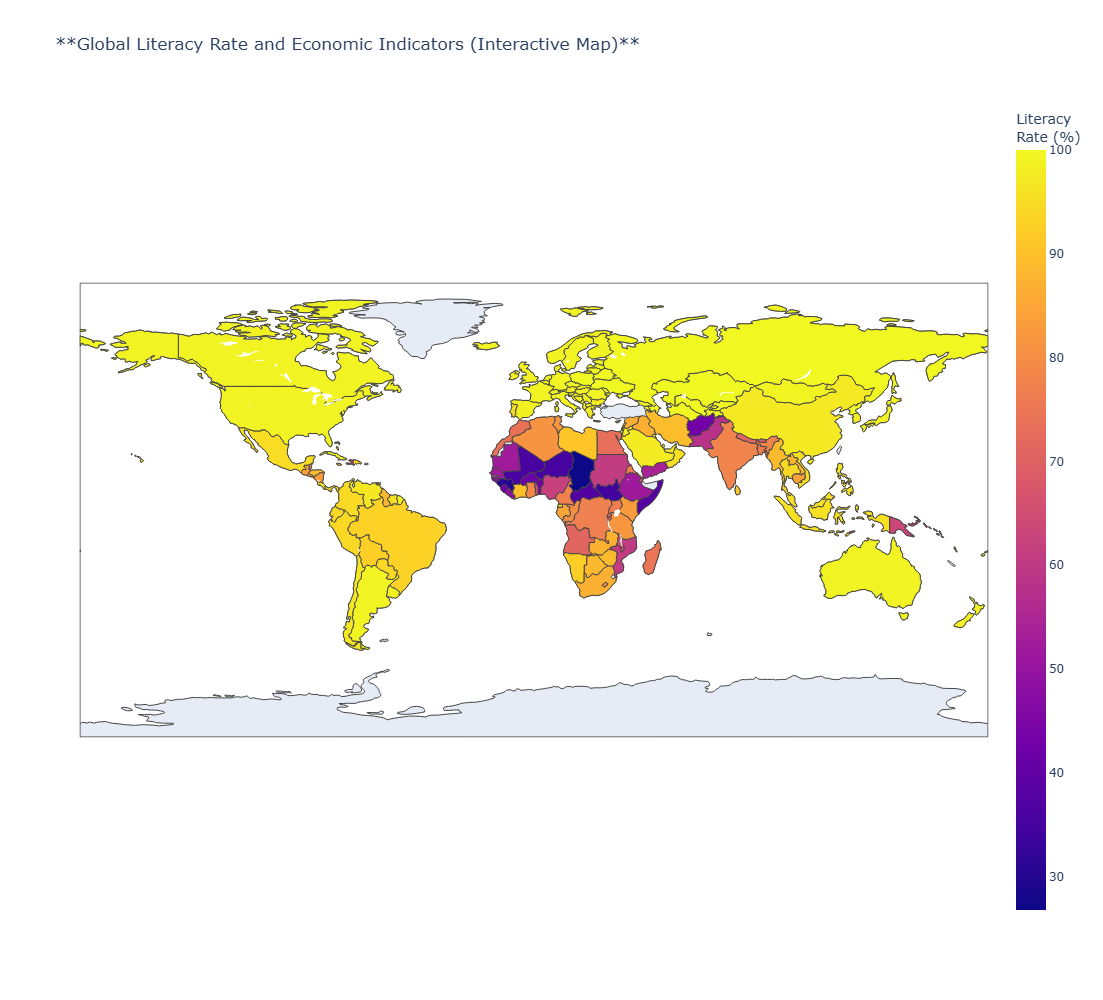

In [75]:
df['Country_Code'] = df['Country'].str.lower().str.strip()
df['Country_Display'] = df['Country'].str.title()
fig = px.choropleth(
    data_frame=df,
    locations='Country_Code',#Column for matching (cleaned country code)
    locationmode='country names',#Specifies that the 'locations' column holds country names
    color='Literacy Rate',#The variable used to color the countries
    hover_name='Country_Display',#Name displayed on hover
    hover_data={
        'Literacy Rate': True,
        'Physician Density': True,
        'Unemployment Rate (%)': True,
        'GDP per Capita (Current USD)': True,
        'Country_Code': False,
        'Country_Display': False,
        'Country': False
    },
    color_continuous_scale=px.colors.sequential.Plasma,
    title='**Global Literacy Rate and Economic Indicators (Interactive Map)**'
    )
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Literacy<br>Rate (%)",
    ),
    height=1000,
)
fig.show()